# Optimizer from scratch

본 take-home project에서는 numpy만을 사용하여 RMSProp optimizer를 구현 해보겠습니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from torch import optim

np.random.seed(42)

In [2]:
import torch

## Rosenbrock function

### Coefficient

In [3]:
a = 1
b = 50

In [4]:
def rosenbrock(x, y):
    return (a - x) ** 2 + b * (y - x ** 2) ** 2

### Surface

In [5]:
xs, ys = np.meshgrid(np.arange(-3., 3., 0.1), np.arange(-3, 3., 0.1))
zs = rosenbrock(xs, ys)

### Starting point

In [6]:
s_x, s_y  = (-2.8, -2.8)
s_z = rosenbrock(s_x, s_y)

### Global min

In [7]:
g_min_x = a
g_min_y = a**2
g_min_z = rosenbrock(g_min_x, g_min_y)

g_min = np.asarray([g_min_x, g_min_y, g_min_z])

## Plot

In [8]:
def rosenbrock_plot():
    plt.figure(figsize=(8, 15))
    ax = plt.axes(projection='3d', elev=50, azim=80)

    ax.plot(*g_min, 'r*', markersize=8)
    ax.plot(s_x, s_y, s_z, 'b*', markersize=8)

    ax.plot_surface(
        xs, ys, zs,
        norm=LogNorm(), rstride=1, cstride=1,
        edgecolor='None', alpha=0.3, cmap=plt.cm.jet
    )

    ax.set_title("Rosenbrock Function Visualization")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    
    return ax

## Implement your RMSProp

In [14]:
def np_rmsprop():
    p = np.asarray([s_x, s_y])
    # implement your rmsprop
    points = None
    
    lr, rho, alph, eps
    
    g = 
    g = rho * r + np.dot((1-rho)*g, g)
    v = alpha * v - np.dot((eps/np.sqrt(r)), g)
    p = p + v
    
    
    return points

## Torch RMSProp

In [10]:
def torch_rmsprop(num_epochs=int(1e4)):
    torch_s_x = torch.tensor(s_x, requires_grad=True)
    torch_s_y = torch.tensor(s_y, requires_grad=True)
    torch_s_z = torch.tensor(s_z)
    
    optimizer = optim.RMSprop([torch_s_x, torch_s_y])
    
    optim_xs = []
    optim_ys = []
    optim_zs = []
    
    for epoch in range(num_epochs):
        x_ = torch_s_x.item()
        y_ = torch_s_y.item()
        z_ = rosenbrock(x_, y_)

        optim_xs.append(x_)
        optim_ys.append(y_)
        optim_zs.append(z_)

        rosenbrock_loss = rosenbrock(torch_s_x, torch_s_y)
        optimizer.zero_grad()
        rosenbrock_loss.backward()

        optimizer.step()
    
    
    return optim_xs, optim_ys, optim_zs

## Optimize

In [11]:
np_points = np_rmsprop()
torch_points = torch_rmsprop()

## Plot optimization path

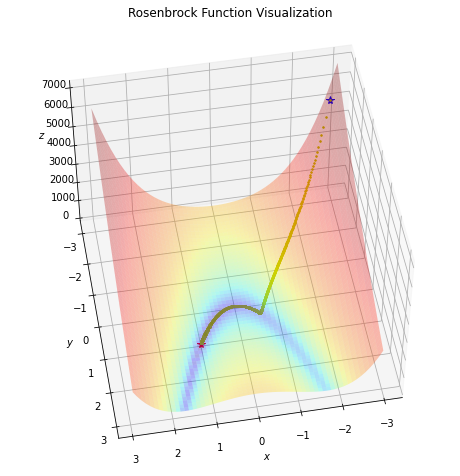

In [12]:
ax = rosenbrock_plot()
# ax.plot(*np_points, 'g-', markersize=5)
ax.plot(*torch_points, 'y.', markersize=3)
plt.show()

In [13]:
np.testing.assert_almost_equal(np_points, torch_points)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'